## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
# Loading Test Dataset
ds = pd.read_excel('Final_Train.xlsx')

In [94]:
# Top 5 contents of Dataset
ds.head()

,Rating,Profile,Fees,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,0,Place_1,Place_2
0,100,5,100,8,252,405,209,95,31,12,5,4,1,24,296,4
1,98,0,350,5,241,405,209,95,31,12,5,4,1,12,856,0
2,94,3,300,79,334,405,209,95,31,12,5,4,1,9,452,0
3,94,0,250,12,7,405,209,95,31,12,5,4,1,12,68,0
4,100,0,250,5,425,405,209,95,31,12,5,4,1,20,335,1


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


We can see that all columns are of Categorical Dtype except Fees

In [96]:
# Shape of Dataset
ds.shape

(5961, 7)

In [97]:
# Checking null values in dataset
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

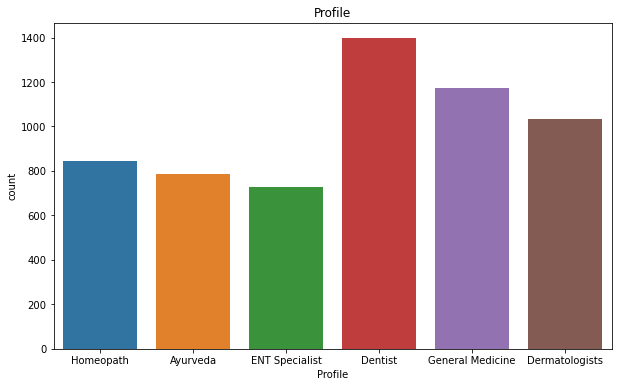

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64


In [121]:
plt.figure(figsize=(10,6))
sns.countplot(x='Profile',data=ds)
plt.title('Profile')
plt.show()


print(ds['Profile'].value_counts())

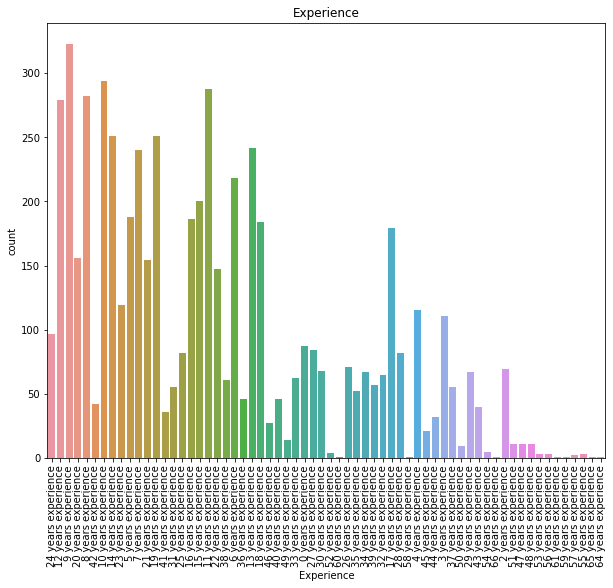

9 years experience     323
10 years experience    294
11 years experience    288
8 years experience     282
12 years experience    279
                      ... 
58 years experience      1
64 years experience      1
65 years experience      1
61 years experience      1
59 years experience      1
Name: Experience, Length: 64, dtype: int64


In [125]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=90)
sns.countplot(x='Experience',data=ds)
plt.title('Experience')
plt.show()


print(ds['Experience'].value_counts())

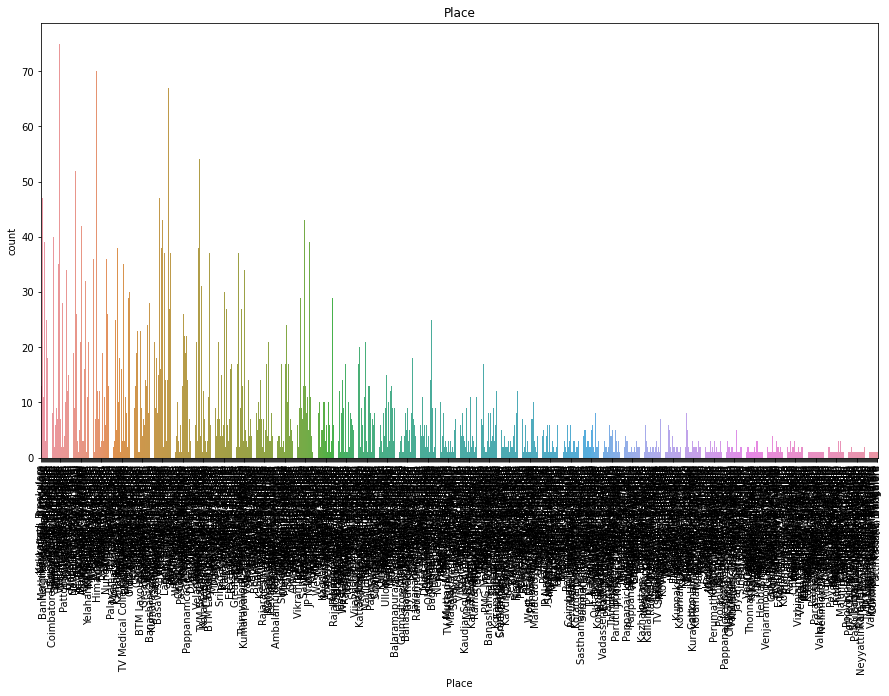

HSR Layout, Bangalore       75
Andheri West, Mumbai        70
Dwarka, Delhi               67
Banjara Hills, Hyderabad    64
Mulund West, Mumbai         54
                            ..
Bakkarwala, Delhi            1
Chinmaya Nagar, Chennai      1
Kalyanpuri, Hyderabad        1
GTB Nagar, Delhi             1
Krishna Nagar, Hyderabad     1
Name: Place, Length: 878, dtype: int64


In [130]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.countplot(x='Place',data=ds)
plt.title('Place')
plt.show()



print(ds['Place'].value_counts())

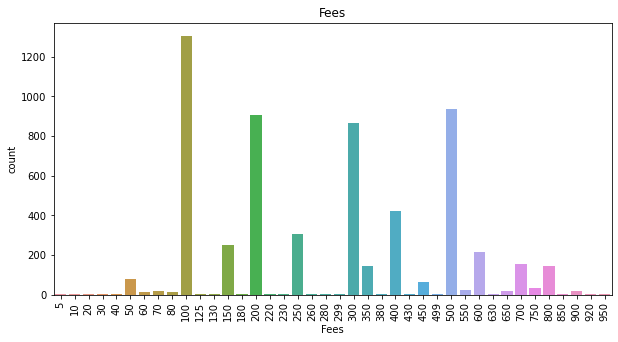

100    1306
500     938
200     904
300     864
400     424
250     307
150     253
600     215
700     153
800     143
350     143
50       81
450      65
750      34
550      22
650      21
900      18
70       18
80       12
60       11
30        4
10        2
260       2
130       2
180       2
40        2
380       2
220       1
280       1
499       1
5         1
920       1
299       1
125       1
230       1
430       1
630       1
850       1
950       1
20        1
Name: Fees, dtype: int64


In [128]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x='Fees',data=ds)
plt.title('Fees')
plt.show()


print(ds['Fees'].value_counts())

# Bivariate Analysis

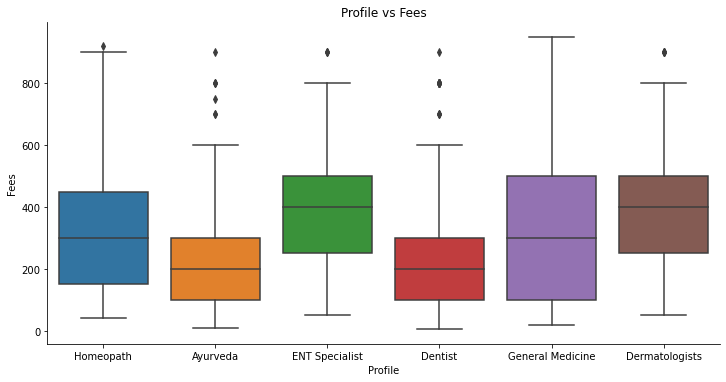

Profile    Fees
Ayurveda   100     203
           200     126
           300     120
           500     111
           150      57
                  ... 
Homeopath  40        1
           130       1
           499       1
           550       1
           920       1
Name: Fees, Length: 133, dtype: int64


In [134]:
sns.catplot(x='Profile',y='Fees',data=ds,kind='box',aspect = 2)
plt.title('Profile vs Fees')
plt.show()


print(ds.groupby('Profile')['Fees'].value_counts())

Text(0.5, 1.0, 'Correlation with Target Variable')

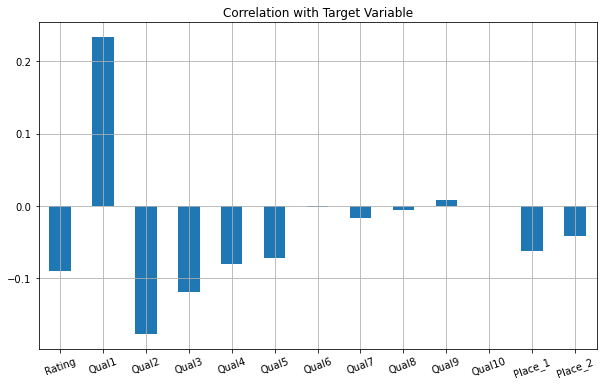

In [143]:
# Checking the correlation with target
plt.figure(figsize=(10,6))
ds.drop('Fees',axis=1).corrwith(ds['Fees']).plot(kind='bar', grid=True)
plt.xticks(rotation=20)
plt.title("Correlation with Target Variable")

## Handling NaN Values

In [98]:
# Checking Unique values in dataset
ds['Rating'].unique()

array(['100%', '98%', nan, '99%', '79%', '95%', '97%', '94%', '88%',
       '90%', '80%', '93%', '36%', '78%', '87%', '96%', '82%', '89%',
       '74%', '86%', '92%', '83%', '76%', '85%', '56%', '91%', '68%',
       '60%', '75%', '69%', '73%', '67%', '77%', '33%', '55%', '71%',
       '84%', '45%', '63%', '72%', '81%', '62%', '57%', '7%', '48%',
       '40%', '70%', '64%', '65%', '47%', '58%', '53%'], dtype=object)

In [99]:
# Extracting numerical data from Rating Column
ds['Rating'] = ds.Rating.str.split(expand=True,pat="%")
ds['Rating'] = ds['Rating'].astype(float)

In [100]:
# Statistics Description of Rating Column for filling NaN Data
ds['Rating'].describe()

count    2659.000000
mean       94.643475
std         7.852813
min         7.000000
25%        93.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: Rating, dtype: float64

In [101]:
# Filling NaN Data with the mean of the column
ds['Rating'] = ds['Rating'].fillna(ds['Rating'].mean())

In [102]:
# Checking Unique values in Place Dataset
ds['Place'].unique()

array(['Kakkanad, Ernakulam', 'Whitefield, Bangalore',
       'Mathikere - BEL, Bangalore', 'Bannerghatta Road, Bangalore',
       'Keelkattalai, Chennai', 'Porur, Chennai', 'Karol Bagh, Delhi',
       'Arekere, Bangalore', 'Old City, Hyderabad', 'Athani, Ernakulam',
       'Thousand Lights, Chennai', 'Somajiguda, Hyderabad',
       'Coimbatore Racecourse, Coimbatore', 'Jubilee Hills, Hyderabad',
       'Kondli, Delhi', 'Saroor Nagar, Hyderabad',
       'Tambaram West, Chennai', 'Purasawakkam, Chennai',
       'KPHB, Hyderabad', 'HSR Layout, Bangalore', 'Pollachi, Coimbatore',
       'Vasundhra Enclave, Delhi', 'Chembur, Mumbai',
       'Thammanam, Ernakulam', 'Andheri, Mumbai',
       'Pattom, Thiruvananthapuram', 'Kukatpally, Hyderabad',
       'Vadavalli, Coimbatore', 'Defence Colony, Delhi',
       'Banjara Hills, Hyderabad', 'Sion West, Mumbai', 'CR Park, Delhi',
       'Mogappair East, Chennai', 'IP Extension, Delhi',
       'Safdarjung Enclave, Delhi', 'New Friends Colony, Delhi

In [103]:
# Filling NaN values with Unknown
ds['Place'] = ds['Place'].fillna('Unknown')

In [104]:
# Droiping Column as the Information given in column is already present in other columns
ds = ds.drop('Miscellaneous_Info',axis = 1)

In [15]:
ds.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100.000000,"Kakkanad, Ernakulam",Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98.000000,"Whitefield, Bangalore",Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,94.643475,"Mathikere - BEL, Bangalore",ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,94.643475,"Bannerghatta Road, Bangalore",Ayurveda,250
4,BAMS,20 years experience,100.000000,"Keelkattalai, Chennai",Ayurveda,250


In [105]:
# Now there are no null values in dataset
ds.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
dtype: int64

In [107]:
# Unique Vales in Qualification 
ds['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [18]:
# Extracting text from column
ds1 = ds.Qualification.str.split(expand=True,pat=",").rename(columns={0:"Qual1",1:"Qual2",2:"Qual3",3:"Qual4",4:"Qual5",
                                                                      5:"Qual6",6:"Qual7",7:"Qual8",8:"Qual9",9:"Qual10"})

In [19]:
ds1= ds1.replace(np.nan,'Blank')

In [108]:
# Enclding Categorical Columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ds1.columns:
    if ds1[column].dtype == np.number:
        continue
    ds1[column] = le.fit_transform(ds1[column])

In [21]:
ds1 = ds1.astype(int)

In [109]:
# Extracting data drom Experience column
ds2 = ds.Experience.str.split(expand=True,pat=" ")

In [23]:
ds2 = ds2.drop([1,2],axis = 1)

In [24]:
ds2

,0
0,24
1,12
2,9
3,12
4,20
...,...
5956,19
5957,33
5958,41
5959,15


In [25]:
ds2 = ds2.astype(int)

In [26]:
# Extracting text from column
ds3 = ds.Place.str.split(expand=True,pat=",").rename(columns={0:"Place_1",1:"Place_2",2:"Place_3"})
ds3= ds3.replace(np.nan,'Blank')

In [27]:
ds3 = ds3.drop('Place_3',axis = 1)

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ds3.columns:
    if ds3[column].dtype == np.number:
        continue
    ds3[column] = le.fit_transform(ds3[column])

In [29]:
ds3 = ds3.astype(int)

In [30]:
ds = ds.drop(['Qualification','Place','Experience'],axis = 1)

In [110]:
# Joining Columns
ds = pd.concat([ds,ds1,ds2,ds3],axis = 1)

In [32]:
ds

,Rating,Profile,Fees,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,0,Place_1,Place_2
0,100.000000,Homeopath,100,8,252,405,209,95,31,12,5,4,1,24,296,4
1,98.000000,Ayurveda,350,5,241,405,209,95,31,12,5,4,1,12,856,0
2,94.643475,ENT Specialist,300,79,334,405,209,95,31,12,5,4,1,9,452,0
3,94.643475,Ayurveda,250,12,7,405,209,95,31,12,5,4,1,12,68,0
4,100.000000,Ayurveda,250,5,425,405,209,95,31,12,5,4,1,20,335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,98.000000,ENT Specialist,300,79,328,405,209,95,31,12,5,4,1,19,70,0
5957,94.643475,General Medicine,100,79,425,405,209,95,31,12,5,4,1,33,535,1
5958,97.000000,General Medicine,600,79,425,405,209,95,31,12,5,4,1,41,215,3
5959,90.000000,General Medicine,100,79,249,405,209,95,31,12,5,4,1,15,841,6


In [33]:
ds['Profile'] = le.fit_transform(ds['Profile'])

In [34]:
ds.head()

,Rating,Profile,Fees,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,0,Place_1,Place_2
0,100.000000,5,100,8,252,405,209,95,31,12,5,4,1,24,296,4
1,98.000000,0,350,5,241,405,209,95,31,12,5,4,1,12,856,0
2,94.643475,3,300,79,334,405,209,95,31,12,5,4,1,9,452,0
3,94.643475,0,250,12,7,405,209,95,31,12,5,4,1,12,68,0
4,100.000000,0,250,5,425,405,209,95,31,12,5,4,1,20,335,1


In [35]:
ds = ds.astype(int)

In [118]:
ds.describe()

,Rating,Fees,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,Place_1,Place_2
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,94.643475,307.944640,47.962087,287.746687,362.027512,202.854051,94.133535,30.912263,11.986915,4.997651,3.998322,0.999832,412.590169,3.098977
std,5.244204,190.920373,39.371696,131.422242,99.164149,28.109759,7.232288,1.340960,0.329984,0.096904,0.070928,0.012952,256.239149,2.350982
min,7.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,94.643475,150.000000,6.000000,227.000000,405.000000,209.000000,95.000000,31.000000,12.000000,5.000000,4.000000,1.000000,195.000000,1.000000
50%,94.643475,300.000000,79.000000,293.000000,405.000000,209.000000,95.000000,31.000000,12.000000,5.000000,4.000000,1.000000,409.000000,3.000000
75%,96.000000,500.000000,79.000000,425.000000,405.000000,209.000000,95.000000,31.000000,12.000000,5.000000,4.000000,1.000000,626.000000,5.000000
max,100.000000,950.000000,150.000000,426.000000,406.000000,212.000000,95.000000,32.000000,12.000000,6.000000,4.000000,1.000000,866.000000,9.000000


In [144]:
dscorr=ds.corr()
dscorr

,Rating,Fees,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,Place_1,Place_2
Rating,1.000000,-0.090106,-0.183467,0.041794,0.012673,-0.026183,0.003039,-0.010840,0.016957,0.025919,0.006833,-0.005821,0.015605,0.024882
Fees,-0.090106,1.000000,0.233285,-0.176750,-0.119252,-0.080357,-0.072367,-0.001307,-0.016726,-0.006246,0.008419,0.000539,-0.062557,-0.041873
Qual1,-0.183467,0.233285,1.000000,-0.415792,-0.177709,-0.073161,-0.035840,-0.030864,-0.024447,-0.019813,-0.015284,-0.006264,0.005356,-0.024606
Qual2,0.041794,-0.176750,-0.415792,1.000000,0.237647,0.123987,0.073169,0.033378,0.037770,0.029162,0.021770,0.024223,0.019544,0.039749
Qual3,0.012673,-0.119252,-0.177709,0.237647,1.000000,0.350585,0.180015,0.083718,0.080180,0.052807,0.025293,0.039717,0.008120,0.025415
Qual4,-0.026183,-0.080357,-0.073161,0.123987,0.350585,1.000000,0.445494,0.217847,0.142459,0.107298,0.110794,0.077355,0.047781,-0.014477
Qual5,0.003039,-0.072367,-0.035840,0.073169,0.180015,0.445494,1.000000,0.439382,0.204406,0.110095,0.205193,0.132786,0.029928,0.004255
Qual6,-0.010840,-0.001307,-0.030864,0.033378,0.083718,0.217847,0.439382,1.000000,0.413745,0.245034,0.434184,0.250324,-0.004103,0.007066
Qual7,0.016957,-0.016726,-0.024447,0.037770,0.080180,0.142459,0.204406,0.413745,1.000000,0.586712,0.400514,0.038744,0.018665,-0.002223
Qual8,0.025919,-0.006246,-0.019813,0.029162,0.052807,0.107298,0.110095,0.245034,0.586712,1.000000,0.390011,0.400729,0.010901,0.008385


<AxesSubplot:>

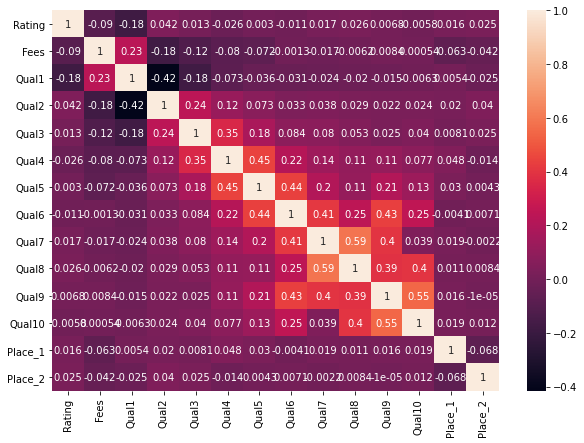

In [147]:
plt.figure(figsize= (10,7))
sns.heatmap(dscorr,annot=True)

In [112]:
# Checking skewness of dataset
ds.skew()

Rating     -4.906222
Fees        0.751870
Qual1       0.068299
Qual2      -0.616841
Qual3      -2.241426
Qual4      -4.988445
Qual5      -9.457908
Qual6     -17.265436
Qual7     -28.300130
Qual8     -41.243175
Qual9     -46.967280
Qual10    -77.207513
0           0.991089
Place_1     0.109243
Place_2     0.081154
dtype: float64

## Distribution Plot

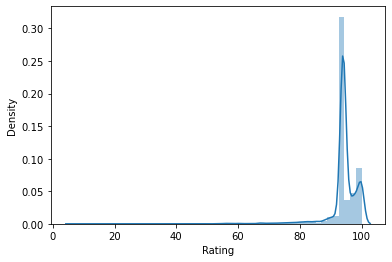

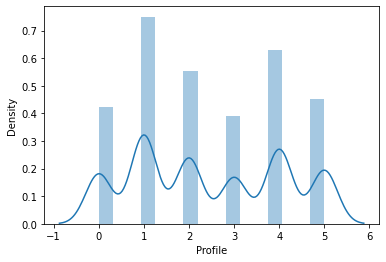

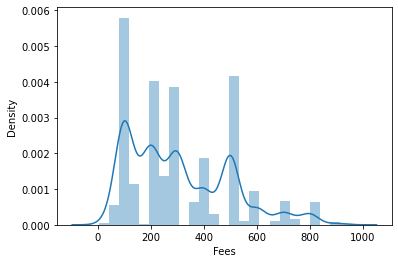

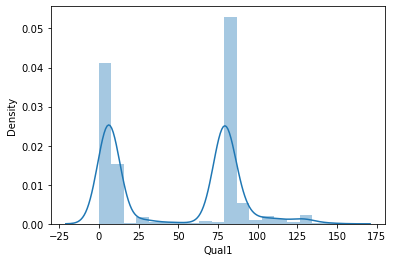

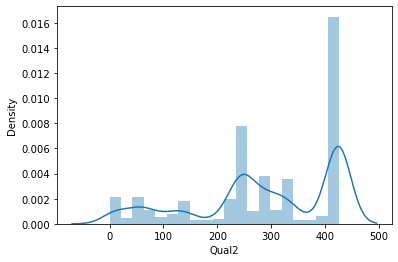

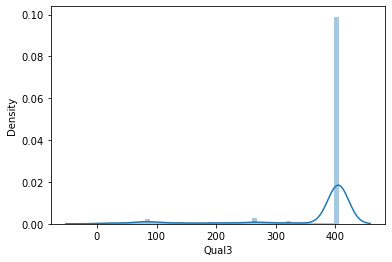

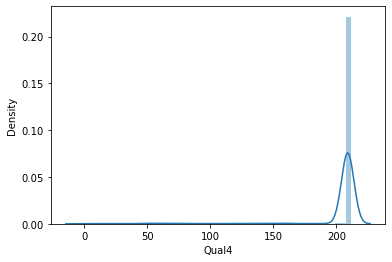

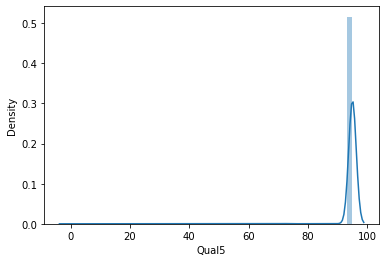

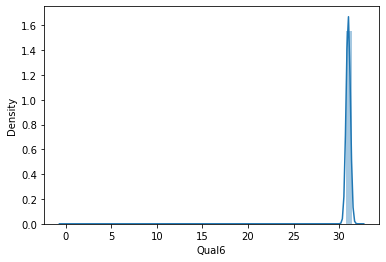

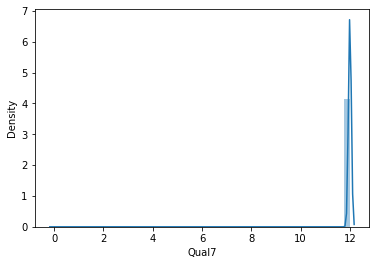

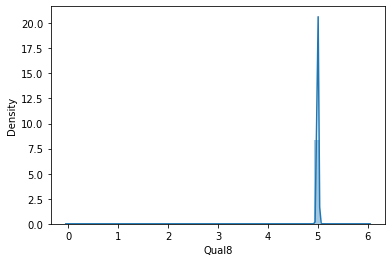

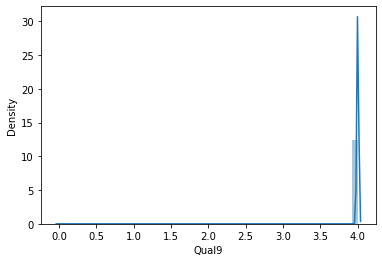

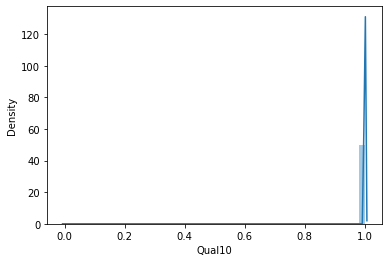

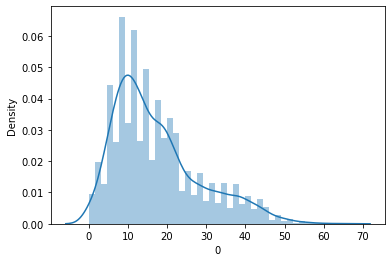

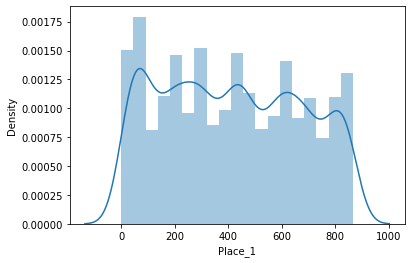

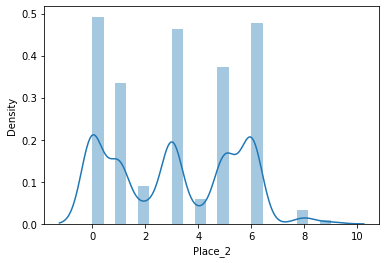

In [37]:

for i in ds.columns:
    sns.distplot(ds[i])
    plt.show()

## Checking Outliers

In [38]:
from scipy.stats import zscore

In [39]:
z=np.abs(zscore(ds))
z

array([[1.08745707, 1.54301587, 1.08926083, ..., 0.60097885, 0.45504347,
        0.38328623],
       [0.70675928, 1.47289258, 0.22029544, ..., 0.47604029, 1.73059827,
        1.31827343],
       [0.0546363 , 0.33665249, 0.04161581, ..., 0.74529508, 0.15381388,
        1.31827343],
       ...,
       [0.51641039, 0.93983418, 1.52985171, ..., 2.12675597, 0.77118093,
        0.04210368],
       [0.81603187, 0.93983418, 1.08926083, ..., 0.20678551, 1.6720543 ,
        1.23406607],
       [1.08745707, 0.86971089, 0.56543832, ..., 0.02728232, 0.71973897,
        0.04210368]])

In [40]:
threshold=3
print(np.where(z>3))

(array([  20,   55,   57,   57,   58,   58,   67,   70,   70,   80,   80,
         94,  105,  110,  140,  140,  178,  183,  209,  239,  239,  246,
        255,  275,  277,  291,  291,  291,  293,  309,  324,  325,  333,
        353,  353,  357,  372,  377,  378,  434,  445,  458,  465,  472,
        472,  487,  548,  574,  585,  590,  597,  601,  624,  632,  639,
        672,  687,  690,  692,  707,  731,  744,  762,  762,  762,  770,
        787,  788,  798,  815,  828,  838,  845,  845,  853,  853,  853,
        853,  901,  911,  918,  922,  943,  943,  968,  974,  979,  980,
        987,  990,  998, 1009, 1012, 1018, 1027, 1050, 1062, 1092, 1111,
       1136, 1136, 1150, 1170, 1177, 1184, 1199, 1199, 1203, 1203, 1204,
       1208, 1228, 1229, 1229, 1240, 1250, 1251, 1256, 1289, 1303, 1313,
       1314, 1317, 1318, 1349, 1350, 1358, 1392, 1395, 1395, 1395, 1397,
       1403, 1419, 1419, 1419, 1423, 1425, 1433, 1444, 1450, 1450, 1455,
       1460, 1469, 1469, 1475, 1478, 1478, 1490, 1

In [41]:
ds_new=ds[(z<3).all(axis=1)]
ds_new

,Rating,Profile,Fees,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,0,Place_1,Place_2
0,100,5,100,8,252,405,209,95,31,12,5,4,1,24,296,4
1,98,0,350,5,241,405,209,95,31,12,5,4,1,12,856,0
2,94,3,300,79,334,405,209,95,31,12,5,4,1,9,452,0
3,94,0,250,12,7,405,209,95,31,12,5,4,1,12,68,0
4,100,0,250,5,425,405,209,95,31,12,5,4,1,20,335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5956,98,3,300,79,328,405,209,95,31,12,5,4,1,19,70,0
5957,94,4,100,79,425,405,209,95,31,12,5,4,1,33,535,1
5958,97,4,600,79,425,405,209,95,31,12,5,4,1,41,215,3
5959,90,4,100,79,249,405,209,95,31,12,5,4,1,15,841,6


In [42]:
ds.shape

(5961, 16)

## %age loss of data after removal of outliers is ~8.5 % which is on higher side so I will not remove outliers.

## Loading Libraries for making Model

In [43]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [113]:
# Defining x-variables
x = ds.drop('Fees',axis = 1)

In [114]:
# Defining y-variables
y = ds['Fees']

In [46]:
from sklearn.preprocessing import power_transform

In [116]:
# removing skewness
x = power_transform(x,method='yeo-johnson')

ValueError: could not convert string to float: 'BHMS, MD - Homeopathy'

In [115]:
# Scaling Dataset
sc=StandardScaler()

x=sc.fit_transform(x)

ValueError: could not convert string to float: 'BHMS, MD - Homeopathy'

### Checking Best Model and Random State

In [49]:
model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

max_r2score=0
for ran_state in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=ran_state)
    for i in model:
        i.fit(x_train,y_train)
        y_pred=i.predict(x_test)
        r2_sco=r2_score(y_test,y_pred)
        if r2_sco > max_r2score:
            max_r2score = r2_sco
            final_state = ran_state
            final_model= i
        

print('max r2_score with random_state',final_state,'is',max_r2score,'and model is',final_model)

IndentationError: unexpected indent (<ipython-input-49-a58cf8b08a96>, line 2)

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=186)

In [51]:
model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print('Score of',m,'is',score)
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
    print('R2_Score:',r2_score(y_test,predm))
    print('*************************************************************************************************************')
    print('\n')

Score of LinearRegression() is 0.08623237733624856
MAE : 148.13834542862188
MSE: 32470.573136085026
RSME: 12.171209694546466
R2_Score: 0.1005853540702012
*************************************************************************************************************


Score of DecisionTreeRegressor() is 0.9977964805803158
MAE : 161.31181894383906
MSE: 51711.630343671415
RSME: 12.700858984487587
R2_Score: -0.43237994294342785
*************************************************************************************************************


Score of RandomForestRegressor() is 0.8856613984405178
MAE : 131.5587314892428
MSE: 28419.175787718043
RSME: 11.469905469934911
R2_Score: 0.21280653650300874
*************************************************************************************************************


Score of KNeighborsRegressor() is 0.36692705256285063
MAE : 144.55725062866722
MSE: 34455.089891031006
RSME: 12.02319635657121
R2_Score: 0.045615476359360696
**********************************

In [52]:
model = [LinearRegression(),DecisionTreeRegressor(), RandomForestRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),
         SVR(),Lasso(),Ridge(),ElasticNet(),GradientBoostingRegressor()]

for m in model:
    score = cross_val_score(m,x,y,cv= 10,scoring = 'r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score :',score.mean())
    print('Standard Deviation:',score.std())
    print('*************************************************************************************************************')
    print('\n')

Model: LinearRegression()
Score: [0.0777627  0.08676695 0.09480063 0.08251152 0.09321581 0.06399806
 0.09316096 0.05142264 0.09084625 0.08863472]
Mean Score : 0.08231202201131385
Standard Deviation: 0.013548080641742002
*************************************************************************************************************


Model: DecisionTreeRegressor()
Score: [-0.59517305 -0.52661546 -0.45698961 -0.60330223 -0.49335433 -0.63020089
 -0.42064611 -0.57561072 -0.42376189 -0.48172115]
Mean Score : -0.5207375425341625
Standard Deviation: 0.07289986310605136
*************************************************************************************************************


Model: RandomForestRegressor()
Score: [0.1586183  0.17777413 0.21242757 0.13127549 0.22484748 0.2224695
 0.25909468 0.15288486 0.17951911 0.21177013]
Mean Score : 0.19306812588474864
Standard Deviation: 0.03741086054864058
***************************************************************************************************

## Hyperparameter Tuning using GridSearchCV for Best Model

In [53]:
rfr=RandomForestRegressor()

rfrpara={
    
    "n_estimators": [600,700],
    "max_depth":[30],
    
}

rfrgrid=GridSearchCV(rfr,param_grid=rfrpara,cv=10,n_jobs=-1)

rfrgrid.fit(x_train,y_train)
print(rfrgrid.best_params_)

{'max_depth': 30, 'n_estimators': 600}


In [54]:
rf1=RandomForestRegressor(max_depth = 30, n_estimators = 700)
rf1.fit(x_train,y_train)
score = rf1.score(x_train,y_train)
predm = rf1.predict(x_test)
print('Score of',rfr,'is',score)
print('MAE :',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
print('R2_Score:',r2_score(y_test,predm))

Score of RandomForestRegressor() is 0.8879795457903559
MAE : 131.31243734342965
MSE: 28238.559444665596
RSME: 11.459163902459448
R2_Score: 0.21780949667728156


In [55]:
rf2=RandomForestRegressor()
rf2.fit(x_train,y_train)
score = rf2.score(x_train,y_train)
predm = rf2.predict(x_test)
print('Score of',rfr,'is',score)
print('MAE :',mean_absolute_error(y_test,predm))
print('MSE:',mean_squared_error(y_test,predm))
print('RSME:',np.sqrt(mean_absolute_error(y_test,predm)))
print('R2_Score:',r2_score(y_test,predm))

Score of RandomForestRegressor() is 0.885092267747144
MAE : 131.4586021634136
MSE: 28299.718738820175
RSME: 11.465539767643458
R2_Score: 0.21611542233289538


## Saving Best Model

In [56]:
import pickle

finalmodel = 'DoctorFees.pkl'
pickle.dump(rf2, open(finalmodel, 'wb'))

## Loading Test Dataset

In [57]:
ds_test = pd.read_excel('Final_Test.xlsx')

In [58]:
ds_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [59]:
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [60]:
ds_test.shape

(1987, 6)

In [61]:
ds_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [62]:
ds_test['Rating'].unique()

array([nan, '70%', '100%', '90%', '94%', '99%', '98%', '87%', '64%',
       '96%', '95%', '97%', '93%', '69%', '71%', '83%', '92%', '80%',
       '86%', '88%', '67%', '85%', '84%', '55%', '89%', '82%', '81%',
       '60%', '73%', '65%', '77%', '91%', '78%', '79%', '76%', '52%',
       '53%'], dtype=object)

In [63]:
ds_test['Rating'] = ds_test.Rating.str.split(expand=True,pat="%")
ds_test['Rating'] = ds_test['Rating'].astype(float)

In [64]:
ds_test['Rating'].describe()

count    897.000000
mean      94.441472
std        7.577514
min       52.000000
25%       93.000000
50%       97.000000
75%       99.000000
max      100.000000
Name: Rating, dtype: float64

In [65]:
ds_test['Rating'] = ds_test['Rating'].fillna(ds_test['Rating'].mean())

In [66]:
ds_test['Place'].unique()

array(['Ghatkopar East, Mumbai', 'West Marredpally, Hyderabad',
       'KK Nagar, Chennai', 'New Ashok Nagar, Delhi',
       'Kanakpura Road, Bangalore', 'Velachery, Chennai',
       'Frazer Town, Bangalore', 'Attapur, Hyderabad',
       'Banashankari, Bangalore', 'Mayur Vihar Ph-I, Delhi',
       'Erragadda, Hyderabad', 'Gandhipuram, Coimbatore',
       'Kemps Corner, Mumbai', 'Banjara Hills, Hyderabad',
       'Madandapuram, Chennai', 'Mukherjee Nagar, Delhi',
       'Tis Hazari, Delhi', 'Banashankari 2nd Stage, Bangalore',
       'Nagawara, Bangalore', 'Basavanagudi, Bangalore', 'Dadar, Mumbai',
       'Kattakada, Thiruvananthapuram', 'Villivakkam, Chennai',
       'Begumpet, Hyderabad', 'Kottivakkam, Chennai',
       'Jeedimetla, Hyderabad', 'Gachibowli, Hyderabad',
       'Chromepet, Chennai', 'Mulund West, Mumbai',
       'Bellandur, Bangalore', 'Kukatpally, Hyderabad',
       'Chandni Chowk, Delhi', 'Vileparle West, Mumbai',
       'Sakinaka, Mumbai', 'Bannerghatta Road, Bangalo

In [67]:
ds_test['Place'] = ds_test['Place'].fillna('Unknown')

In [68]:
ds_test = ds_test.drop('Miscellaneous_Info',axis = 1)

In [69]:
ds_test['Qualification'].unique()

array(['MBBS', 'MBBS, Diploma in Otorhinolaryngology (DLO)', 'MBBS, DDVL',
       'BAMS', 'BDS, MDS - Conservative Dentistry & Endodontics',
       'BDS, MDS', 'BDS, MDS - Pedodontics',
       'MD - Ayurveda Medicine, BAMS, Yoga Teachers Training Course, M. D. IN KAYACHIKISTA',
       'BHMS', 'BDS', 'MBBS, FCD - Diabetology', 'MBBS, DDV',
       'MBBS, MD - Dermatology', 'MS - ENT',
       'MBBS, Diploma in Otorhinolaryngology (DLO), MS - ENT, DNB - ENT, MNAMS (Membership of the National Academy)',
       'BHMS, Diploma in Naturopathy & Yogic Science (DNYS), Diploma in Diet and Nutrition, Diploma in Cosmetology',
       'MBBS, PG Diploma In Clinical Cosmetology (PGDCC)',
       'BDS, MDS - Periodontics', 'BDS, MDS- Oral Pathology',
       'MBBS, MD - General Medicine', 'MS - ENT, MBBS',
       'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
       'MBBS, MS - ENT, DNB - Otorhinolaryngology',
       'BDS, PhD - Endodontics, MDS - Conservative Dentistry & Endodontics',
       'B

In [70]:
# Extracting text from column
ds_test1 = ds_test.Qualification.str.split(expand=True,pat=",").rename(columns={0:"Qual1",1:"Qual2",2:"Qual3",3:"Qual4",
            4:"Qual5",5:"Qual6",6:"Qual7",7:"Qual8",8:"Qual9",9:"Qual10"})

In [71]:
ds_test1= ds_test1.replace(np.nan,'Blank')

In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ds_test1.columns:
    if ds_test1[column].dtype == np.number:
        continue
    ds_test1[column] = le.fit_transform(ds_test1[column])

In [73]:
ds_test1 = ds_test1.astype(int)

In [74]:
ds_test1

,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,10,11,12,13,14,15,16
0,48,243,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
1,48,79,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
2,48,28,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
3,1,243,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
4,2,157,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,1,86,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
1983,52,241,129,89,35,8,3,2,2,1,1,1,1,1,1,1,1
1984,48,153,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1
1985,2,243,194,89,35,8,3,2,2,1,1,1,1,1,1,1,1


In [75]:
ds_test1 = ds_test1.drop([10,11,12,13,14,15,16],axis = 1)

In [76]:
ds_test2 = ds_test.Experience.str.split(expand=True,pat=" ")

In [77]:
ds_test2 = ds_test2.drop([1,2],axis = 1)

In [78]:
ds_test2 = ds_test2.astype(int)

In [79]:
# Extracting text from column
ds_test3 = ds_test.Place.str.split(expand=True,pat=",").rename(columns={0:"Place_1",1:"Place_2",2:"Place_3"})

In [80]:
ds_test3= ds_test3.replace(np.nan,'Blank')

In [81]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in ds_test3.columns:
    if ds_test3[column].dtype == np.number:
        continue
    ds_test3[column] = le.fit_transform(ds_test3[column])

In [82]:
ds_test3 = ds_test3.astype(int)

In [83]:
ds_test = ds_test.drop(['Qualification','Place','Experience'],axis = 1)

In [84]:
ds_test = pd.concat([ds_test,ds_test1,ds_test2,ds_test3],axis = 1)

In [85]:
ds_test['Profile'] = le.fit_transform(ds_test['Profile'])

In [86]:
ds_test.head()

,Rating,Profile,Qual1,Qual2,Qual3,Qual4,Qual5,Qual6,Qual7,Qual8,Qual9,Qual10,0,Place_1,Place_2
0,94.441472,4,48,243,194,89,35,8,3,2,2,1,35,142,6
1,94.441472,3,48,79,194,89,35,8,3,2,2,1,31,578,5
2,70.000000,2,48,28,194,89,35,8,3,2,2,1,40,212,1
3,94.441472,0,1,243,194,89,35,8,3,2,2,1,0,373,3
4,100.000000,1,2,157,194,89,35,8,3,2,2,1,16,231,0


In [87]:
ds_test = ds_test.astype(int)

In [88]:
ds_test.skew()

Rating     -3.655600
Profile     0.028926
Qual1       0.013098
Qual2      -0.458845
Qual3      -2.185130
Qual4      -5.074211
Qual5      -9.510638
Qual6     -19.767386
Qual7     -30.609037
Qual8     -35.868344
Qual9     -35.868344
Qual10    -44.575778
0           0.963447
Place_1     0.036802
Place_2     0.007716
dtype: float64

In [89]:
from sklearn.preprocessing import power_transform

ds_test = power_transform(ds_test,method='yeo-johnson')

In [90]:
sc=StandardScaler()

ds_test=sc.fit_transform(ds_test)

In [91]:
# Load the Model for testing
final_model= pickle.load(open('DoctorFees.pkl', "rb"))

In [92]:
final_test = final_model.predict(ds_test)

final_test

array([330.1, 303.3, 371.5, ..., 343.5, 193.8, 395.5])